#Import libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#matplotlib inline

#Dataset overview

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#dataset description
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#shape of the dataset
df.shape

(10000, 14)

In [ ]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#checking the data type of each column
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#data of customer who has exited from this bank
df[df['Exited']==1]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


#Exploratory Data Analysis

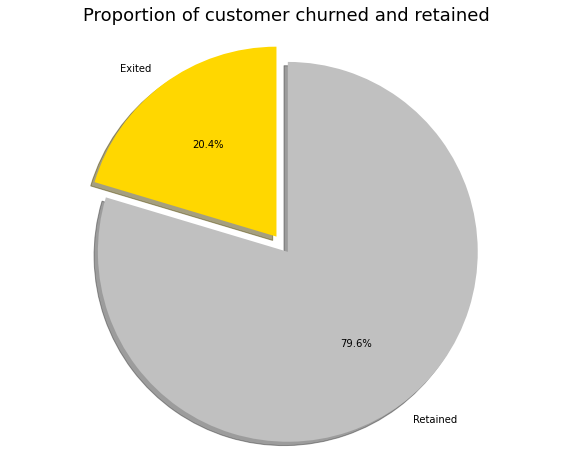

In [ ]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
colors = ['Gold','Silver']
ax1.pie(sizes,colors=colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 18)
plt.show()

So we can see about 20% of the customers have churned so bank has to see the reason behind it.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


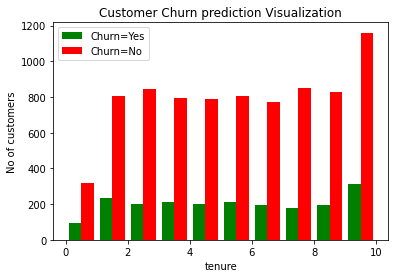

In [ ]:
#histogram for tenure vs no. of customer exited or retained
tenure_churn_no=df[df.Exited==0].Tenure
tenure_churn_yes=df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("No of customers")
plt.title("Customer Churn prediction Visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Here, we can see as tenure is increasing, number of customer is leaving. So tenure in inverse to churn.

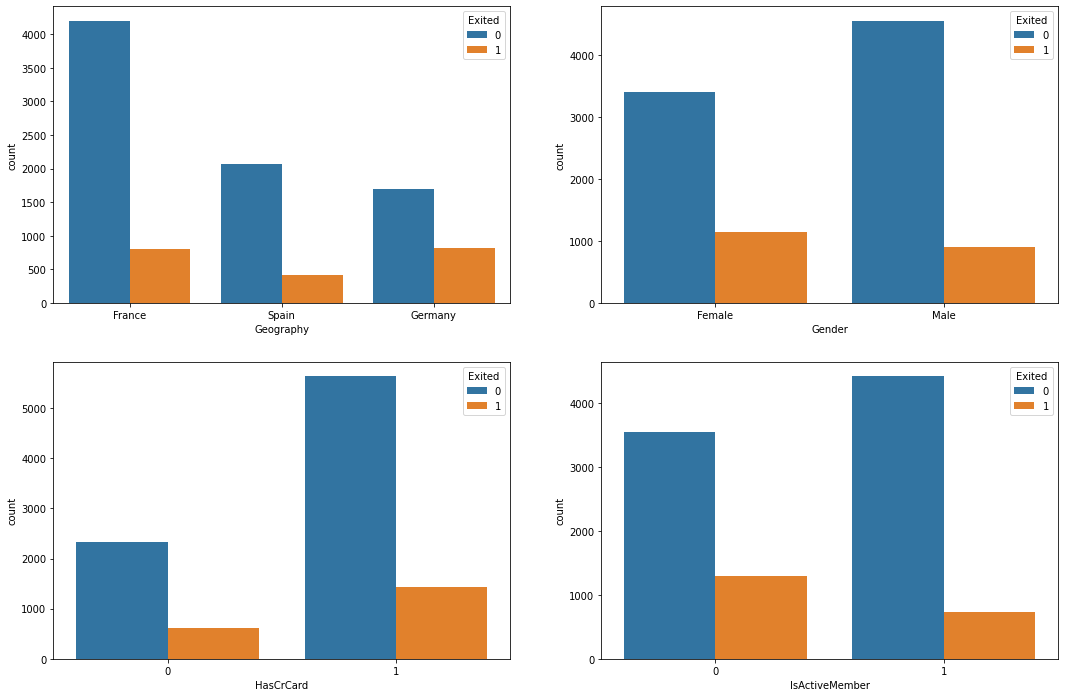

In [ ]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(18, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

We note the following:

1) Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

2) The proportion of female customers churning is also greater than that of male customers

3) Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

4) Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

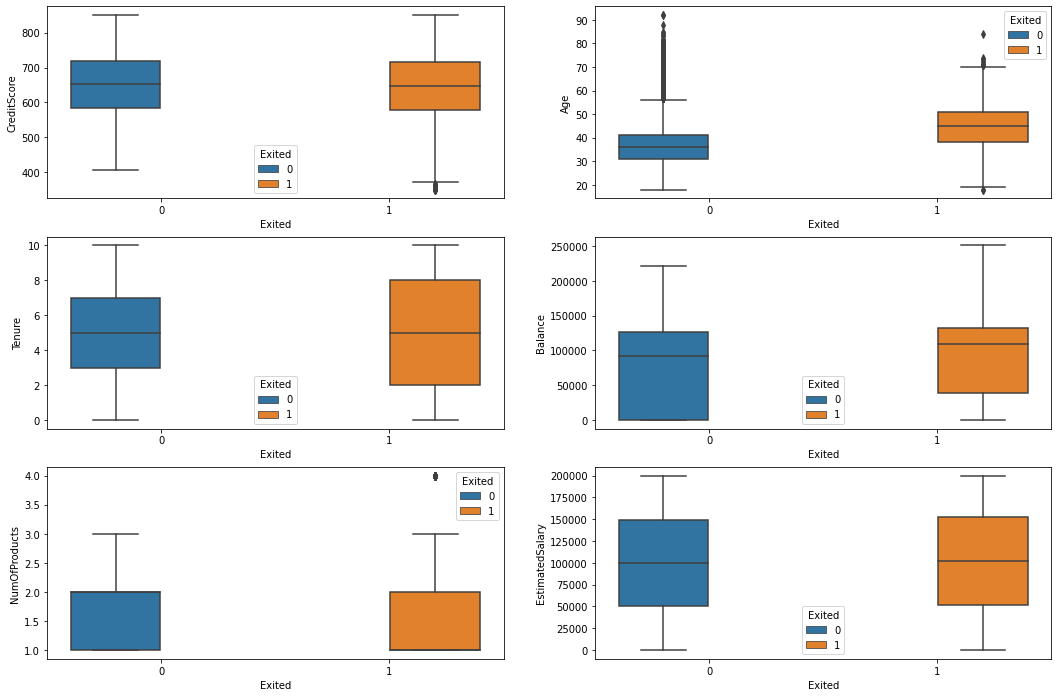

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(18, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

We note the following:

1) There is no significant difference in the credit score distribution between retained and churned customers.

2) The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups

3) With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

4) Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

5) Neither the product nor the salary has a significant effect on the likelihood to churn.

#Data preprocessing

In [ ]:
#Checking whether dataset has object data type columns
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Surname:['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [ ]:
#drop column: RowNumber, CustomerId, Surname as it is not needed
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [ ]:
#One-hot encoding for geography and gender 
df1=pd.get_dummies(data=df,columns=['Geography','Gender'])
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
df1.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
666,559,31,3,127070.73,1,0,1,160941.78,0,1,0,0,1,0
6600,505,36,2,79951.90,1,0,1,174123.16,1,1,0,0,1,0
1111,833,59,1,130854.59,1,1,1,30722.52,1,0,1,0,0,1
826,680,47,5,0.00,2,1,1,179843.33,0,1,0,0,1,0
7399,668,37,7,128645.67,1,1,0,92149.64,0,1,0,0,1,0


In [ ]:
df1.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

In [ ]:
df1.shape

(10000, 14)

#Scaling

In [ ]:
cols_to_scale=['Tenure','Age','CreditScore','Balance','NumOfProducts','EstimatedSalary']

scaler = MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [ ]:
df1.shape

(10000, 14)

In [ ]:
# Separated response column in y and features in x
x=df1.drop('Exited',axis='columns')
y=df1['Exited']

#Build the model using neural  networks

In [ ]:
#Splitting the dataset 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=200)

In [ ]:
print("Shape of x_train",x_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (7500, 13)
Shape of y_train (7500,)
Shape of x_test (2500, 13)
Shape of y_test (2500,)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.02)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
235/235 [==============================] - 1s 1ms/step - loss: 0.4904 - accuracy: 0.7882
Epoch 2/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8185
Epoch 3/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8253
Epoch 4/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8333
Epoch 5/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4068 - accuracy: 0.8330
Epoch 6/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8467
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8444
Epoch 8/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8536
Epoch 9/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8516
Epoch 10/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3484 - accura

In [ ]:
model.evaluate(x_test,y_test)

79/79 [==============================] - 0s 939us/step - loss: 0.3612 - accuracy: 0.8520


[0.3611532151699066, 0.8519999980926514]

In [ ]:
yp=model.predict(x_test)
yp[:5]

array([[0.02433017],
       [0.07523751],
       [0.15964097],
       [0.42646658],
       [0.03552189]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [ ]:
#converted array to list
Y_test=y_test.to_list()

In [ ]:
print("Predicted output",y_pred[:10])
print("Actual output",Y_test[:10])

Predicted output [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Actual output [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1978
           1       0.72      0.48      0.58       522

    accuracy                           0.85      2500
   macro avg       0.80      0.72      0.74      2500
weighted avg       0.84      0.85      0.84      2500



Text(33.0, 0.5, 'Truth')

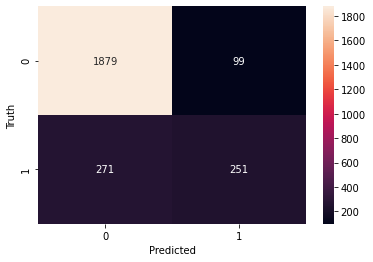

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Build a model using machine learning algorithms

In [ ]:
#fit model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.naive_bayes import GaussianNB  
from sklearn.linear_model import SGDClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

###Stratified K Fold Cross validation

In [ ]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=45)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(x,y):
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]

##logistics regression

In [ ]:
log_reg=LogisticRegression(C=20)
log_reg.fit(xtr,ytr)

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lg = log_reg.predict(xtr)
lg_cvs=cross_val_score(log_reg,xtr,ytr,scoring='accuracy')
print(lg_cvs)

[0.80875  0.813125 0.8075   0.818125 0.80875 ]


In [ ]:
print(classification_report(ytr, y_pred_lg))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6370
           1       0.62      0.21      0.32      1630

    accuracy                           0.81      8000
   macro avg       0.72      0.59      0.60      8000
weighted avg       0.78      0.81      0.77      8000



##Logistic regression using degree=2 

In [ ]:
poly=PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_poly_lg2 = poly.fit_transform(xtr)
log_reg2 = LogisticRegression()
log_reg2.fit(x_poly_lg2,ytr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lg2=log_reg2.predict(poly.transform(xtr))
lg2_cvs=cross_val_score(log_reg2,xtr,ytr,scoring='accuracy')
print(lg2_cvs)

[0.81125  0.8175   0.806875 0.8175   0.810625]


In [ ]:
print(classification_report(ytr, y_pred_lg2))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6370
           1       0.79      0.36      0.49      1630

    accuracy                           0.85      8000
   macro avg       0.82      0.67      0.70      8000
weighted avg       0.84      0.85      0.83      8000



##Random forest algorithm



In [ ]:
rand_forest= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
rand_forest.fit(xtr, ytr)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf = rand_forest.predict(xtr)
rf_cvs=cross_val_score(rand_forest,xtr,ytr,scoring='accuracy')
print(rf_cvs)

[0.854375 0.87125  0.85875  0.8675   0.85375 ]


In [ ]:
print(classification_report(ytr, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6370
           1       0.88      0.49      0.63      1630

    accuracy                           0.88      8000
   macro avg       0.88      0.74      0.78      8000
weighted avg       0.88      0.88      0.87      8000



##XGBoost Algorithm

In [ ]:
XGBoost= XGBClassifier(n_estimators=100)
XGBoost.fit(xtr, ytr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgb = XGBoost.predict(xtr)
xgb_cvs=cross_val_score(XGBoost,xtr,ytr,scoring='accuracy')
print(xgb_cvs)


[0.86     0.873125 0.8575   0.865    0.853125]


In [ ]:
print(classification_report(ytr, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6370
           1       0.80      0.47      0.59      1630

    accuracy                           0.87      8000
   macro avg       0.84      0.72      0.76      8000
weighted avg       0.86      0.87      0.85      8000



##Support vector machine

In [ ]:
SVM = svm.SVC(C=250, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM.fit(xtr,ytr)

SVC(C=250, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_svm = SVM.predict(xtr)
svm_cvs=cross_val_score(SVM,xtr,ytr,scoring='accuracy')
print(svm_cvs)

[0.85     0.863125 0.8525   0.861875 0.845   ]


In [ ]:
print(classification_report(ytr, y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6370
           1       0.81      0.38      0.52      1630

    accuracy                           0.85      8000
   macro avg       0.83      0.68      0.71      8000
weighted avg       0.85      0.85      0.83      8000



##KNN Classifier

In [ ]:
knn_classifier= KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2 )  
knn_classifier.fit(xtr, ytr)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn_classifier.predict(xtr)
knn_cvs=cross_val_score(knn_classifier,xtr,ytr,scoring='accuracy')
print(knn_cvs)

[0.79875  0.824375 0.813125 0.81     0.81875 ]


In [ ]:
print(classification_report(ytr, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      6370
           1       0.76      0.33      0.46      1630

    accuracy                           0.84      8000
   macro avg       0.80      0.65      0.68      8000
weighted avg       0.83      0.84      0.82      8000



##Naive Bayes

In [ ]:
nb_classifier = GaussianNB()  
nb_classifier.fit(xtr, ytr)  

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb = nb_classifier.predict(xtr)
nb_cvs=cross_val_score(nb_classifier,xtr,ytr,scoring='accuracy')
print(nb_cvs)

[0.8025   0.819375 0.819375 0.814375 0.808125]


In [ ]:
print(classification_report(ytr, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6370
           1       0.56      0.37      0.45      1630

    accuracy                           0.81      8000
   macro avg       0.71      0.65      0.67      8000
weighted avg       0.79      0.81      0.80      8000



##Stochastic Gradient Descent (SGD)

In [ ]:
sgd_classifier = SGDClassifier(loss="log", penalty="l2", max_iter=9)
sgd_classifier.fit(xtr, ytr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=9,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred_sgd = sgd_classifier.predict(xtr)
sgd_cvs=cross_val_score(sgd_classifier,xtr,ytr,scoring='accuracy')
print(sgd_cvs)

[0.82     0.815625 0.801875 0.819375 0.784375]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

In [ ]:
print(classification_report(ytr, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6370
           1       0.66      0.18      0.28      1630

    accuracy                           0.81      8000
   macro avg       0.74      0.58      0.59      8000
weighted avg       0.79      0.81      0.77      8000



#Plotting ROC Score

In [ ]:
X_pol2 = x_poly_lg2 
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(ytr, log_reg.predict(xtr),log_reg.predict_proba(xtr)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(ytr, log_reg2.predict(X_pol2),log_reg2.predict_proba(X_pol2)[:,1])
auc_SVM, fpr_SVM, tpr_SVM = get_auc_scores(ytr, SVM.predict(xtr),SVM.predict_proba(xtr)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(ytr, rand_forest.predict(xtr),rand_forest.predict_proba(xtr)[:,1])
auc_KNN, fpr_KNN, tpr_KNN = get_auc_scores(ytr, knn_classifier.predict(xtr),knn_classifier.predict_proba(xtr)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(ytr, XGBoost.predict(xtr),XGBoost.predict_proba(xtr)[:,1])
auc_SGD, fpr_SGD, tpr_SGD = get_auc_scores(ytr, sgd_classifier.predict(xtr),sgd_classifier.predict_proba(xtr)[:,1])
auc_NB, fpr_NB, tpr_NB = get_auc_scores(ytr, nb_classifier.predict(xtr),nb_classifier.predict_proba(xtr)[:,1])

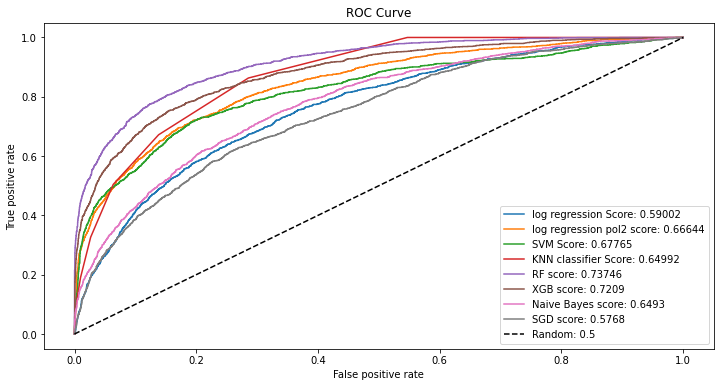

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log regression Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log regression pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM, tpr_SVM, label = 'SVM Score: ' + str(round(auc_SVM, 5)))
plt.plot(fpr_KNN, tpr_KNN, label = 'KNN classifier Score: ' + str(round(auc_KNN, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot(fpr_NB, tpr_NB, label = 'Naive Bayes score: ' + str(round(auc_NB, 5)))
plt.plot(fpr_SGD, tpr_SGD, label = 'SGD score: ' + str(round(auc_SGD, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
p = {'Model': ['Random Forest', 'Logistic Regression', 'Logistic Regression degree 2', 'SVM','XGBoost','KNN classifier','Naive Bayes','SGD Classifier'],
     'ROC Score' : [ auc_RF,auc_log_primal, auc_log_pol2, auc_SVM, auc_XGB,auc_KNN,auc_NB,auc_SGD]}

ROCScore_result_df = pd.DataFrame(data = p)
ROCScore_result_df

,Model,ROC Score
0,Random Forest,0.737457
1,Logistic Regression,0.590022
2,Logistic Regression degree 2,0.666440
3,SVM,0.677647
4,XGBoost,0.720897
5,KNN classifier,0.649925
6,Naive Bayes,0.649297
7,SGD Classifier,0.576798


(0.0, 1.0)

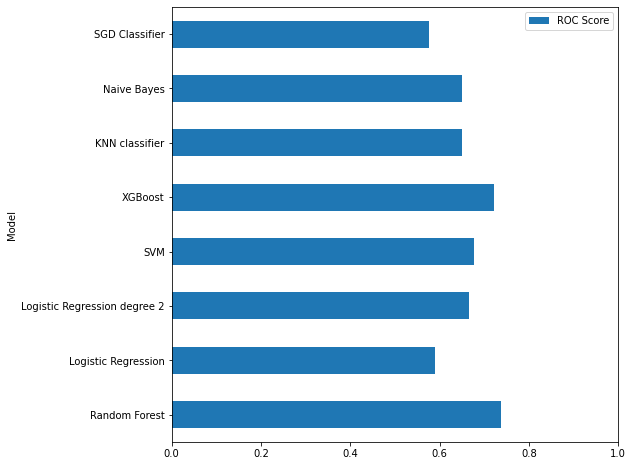

In [ ]:
ROCScore_result_df.plot(x='Model',kind='barh', figsize=(8, 8)).set_xlim([0,1.0])

**Conclusion:**

From the above result, main aim of churn prediction is to predict the customer that will possibly churn so as bank can keep some scheme to prevent it hence recall measures on the 1's (Exited=1) is more important than overall score of the model. Also as dataset in unbalanced dataset we will have to check precision, recall rather than accuracy.

In given dataset, only 20% of data is of churn(Exited = 1), that means recall greater than this baseline is already a improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives (i.e the one who is not exited is predicted as exited).

From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the **Random Forest** where according to the fit on the training set, with a precision score on 1's of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.49 on the 1's, the model is able to highlight 49% of all those who churned

##Model precision accuracy on test data

In [ ]:
ytest_pred_nb=rand_forest.predict(xvl)
print(classification_report(yvl, ytest_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.85      0.45      0.59       407

    accuracy                           0.87      2000
   macro avg       0.86      0.71      0.76      2000
weighted avg       0.87      0.87      0.86      2000



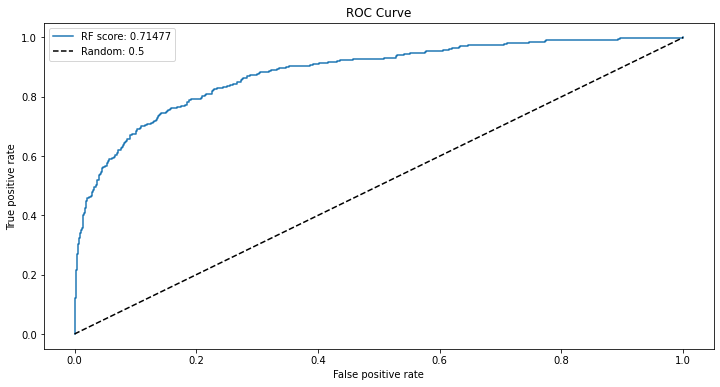

In [ ]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(yvl, rand_forest.predict(xvl),rand_forest.predict_proba(xvl)[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model to save the 46% that would have churned.